In [1]:
import apts.equipment as eq
import pandas as pd

%matplotlib inline  

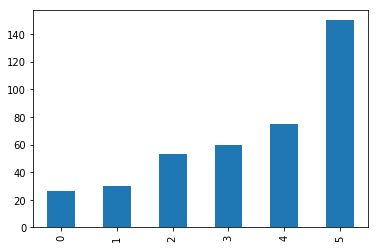

In [2]:
e = eq.Equipment()

sky_watcher = "SkyWatcher"
nikon = "Nikon"

t = eq.Telescope(150, 750, sky_watcher, t2_output = True)
c = eq.Camera(23.5, 15.6, 6000, 4000, nikon)

e.register(t)
e.register(c)
e.register(eq.Eyepiece(25, sky_watcher))
e.register(eq.Eyepiece(10, sky_watcher))
e.register(eq.Barlow(2, sky_watcher, t2_output = True))

unique_zooms = sorted(list(set(e.get_eye_zooms() + e.get_camera_zooms())))
zooms = pd.Series(unique_zooms)
zooms.plot(kind='bar')

In [3]:
t.min_useful_zoom(), t.max_useful_zoom()

(25.0, 300)

In [4]:
c.pixel_size()

0.003911546025255526

In [5]:
for x in e.get_eye_paths():
    x.print()

Setup:
 * SkyWatcher 150/750
 * SkyWatcher f=25
Zoom: 30.00
Field of view: 1°44'0"
Setup:
 * SkyWatcher 150/750
 * SkyWatcher f=10
Zoom: 75.00
Field of view: 0°41'36"
Setup:
 * SkyWatcher 150/750
 * SkyWatcher x2
 * SkyWatcher f=25
Zoom: 60.00
Field of view: 0°52'0"
Setup:
 * SkyWatcher 150/750
 * SkyWatcher x2
 * SkyWatcher f=10
Zoom: 150.00
Field of view: 0°20'48"


In [6]:
for x in e.get_image_paths():
    x.print()

Setup:
 * SkyWatcher 150/750
 * SkyWatcher x2
 * Nikon 23.5x15.6
Zoom: 53.18
Field of view: 0°35'45"
Setup:
 * SkyWatcher 150/750
 * Nikon 23.5x15.6
Zoom: 26.59
Field of view: 1°11'30"


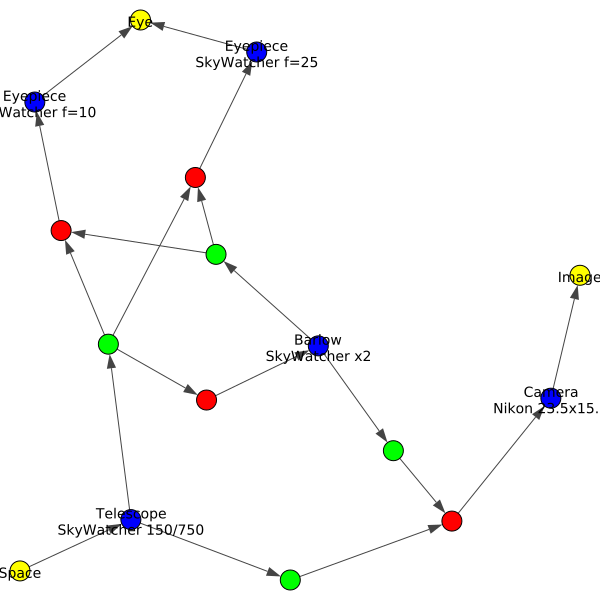

In [9]:
e.plot_connection_garph()